#Usuarios de Netflix

# Contexto comercial

Netflix ofrece tres tipos de planes: Básico, Estándar y Premium. El objetivo principal es maximizar los ingresos recurrentes mensuales y mantener una base sólida de clientes satisfechos. Los usuarios provienen de diversas regiones y utilizan una variedad de dispositivos.

# Problema comercial

La empresa busca entender los patrones de comportamiento y segmentación de sus clientes para aumentar la retención y mejorar la experiencia de usuario. Además, desea identificar qué factores contribuyen más al ingreso y evaluar si hay diferencias notables según el país, el dispositivo, la edad o el tipo de suscripción.









# Contexto analítico

El análisis se centrará en:

-Segmentación de clientes según los ingresos mensuales y las características demográficas.     
-Identificación de patrones de uso de dispositivos y planes de suscripción.   
-Evaluación del impacto del tiempo de permanencia en los ingresos mensuales.

# Objetivo del análisis


-Entender la relación entre las características de los usuarios y el ingreso mensual.     
-Proponer estrategias para mejorar la retención y fomentar la conversión a planes Premium.       
-Evaluar si existen segmentos de alto potencial en ciertos países, edades o dispositivos.

#Hipótesis

-Los clientes que usan dispositivos Smart TV generan ingresos mayores que aquellos con otros dispositivos.       
-Los usuarios con planes Premium tienen una mayor permanencia en la plataforma.   
-Los países con mayor participación tienden a generar mayores ingresos mensuales.

# Descripción del dataset

**Variables:**       

-User ID: Identificador único de cada usuario.     
-Subscription Type: Tipo de suscripción (Basic, Standard, Premium).     
-Monthly Revenue: Ingreso mensual generado por el usuario.       
-Join Date: Fecha en que el usuario se unió.      
-Last Payment Date: Última fecha de pago.      
-Country: País del usuario.       
-Age: Edad del usuario.       
-Gender: Género del usuario.       
-Device: Dispositivo principal utilizado.       
-Plan Duration: Duración del plan actual.        

# Importación de librerías y lectura de datos

Se importan las librerías que iremos utilizando durante el proyecto, se leen y guardan los datos.

In [4]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

**Se importan librerías que se usan en el proyecto.**

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/Bases de datos/Netflix usuarios.csv'

[Errno 20] Not a directory: '/content/drive/MyDrive/Bases de datos/Netflix usuarios.csv'
/content


Se imprimen las primeras observaciones del dataset

In [5]:
df= pd.read_csv ('/content/drive/MyDrive/Bases de datos/Netflix usuarios.csv', delimiter= ';')
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15/01/2022,10/06/2023,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,5/09/2021,22/06/2023,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28/02/2023,27/06/2023,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10/07/2022,26/06/2023,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,1/05/2023,28/06/2023,Germany,33,Male,Smartphone,1 Month


In [6]:
num_filas, num_columnas = df.shape
print(f"Número de filas: {num_filas}, Número de columnas: {num_columnas}")

Número de filas: 2500, Número de columnas: 10


El dataset contiene 2500 observaciones y 10 variables.

# Limpieza y prepocesamiento de datos

Se realizan los siguientes pasos:
- Tratar columnas de fecha
-Tratar los nulos      
-Tratar los duplicados   

Se convierten las columnas de fecha a formato datetime



In [7]:
# Convertir las columnas de fecha al formato datetime
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d/%m/%Y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d/%m/%Y')

Se buscan posibles valores nulos

In [8]:
# Identificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


No se encuentran valores nulos en el dataset.

Se verifica si hay valores duplicados

In [9]:
# Verificar valores duplicados
duplicates = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates}")

Número de filas duplicadas: 0


No se encuentran valores duplicados en el dataset.

**Preprocesamiento de datos**

In [10]:
# Crear nuevas columnas derivadas
df['Days Since Join'] = (df['Last Payment Date'] - df['Join Date']).dt.days
df['Annual Revenue'] = df['Monthly Revenue'] * 12

# Normalizar valores de texto (si fuera necesario)
df['Country'] = df['Country'].str.title()
df['Device'] = df['Device'].str.lower()

#Análisis exploratorio de datos

En este apartado, se busca estudiar la relación entre variables haciendo uso de gráficos. Por otra parte, se realizan modificaciones pertinentes en el dataset cuando se consideran necesarias.
Los nombres de cada categoria se obtuvieron de la página de kaggle, citado en la sección "Descripción del dataset".

In [11]:
df.head(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Days Since Join,Annual Revenue
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,smartphone,1 Month,511,120
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,tablet,1 Month,655,180
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,smart tv,1 Month,119,144
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,laptop,1 Month,351,144
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,smartphone,1 Month,58,120
5,6,Premium,15,2022-03-18,2023-06-27,France,29,Female,smart tv,1 Month,466,180
6,7,Standard,12,2021-12-09,2023-06-25,Brazil,46,Male,tablet,1 Month,563,144
7,8,Basic,10,2023-04-02,2023-06-24,Mexico,39,Female,laptop,1 Month,83,120
8,9,Standard,12,2022-10-20,2023-06-23,Spain,37,Male,smartphone,1 Month,246,144
9,10,Premium,15,2023-01-07,2023-06-22,Italy,44,Female,smart tv,1 Month,166,180


1. Relación entre características de usuarios e ingresos mensuales     
a. Distribución de ingresos mensuales

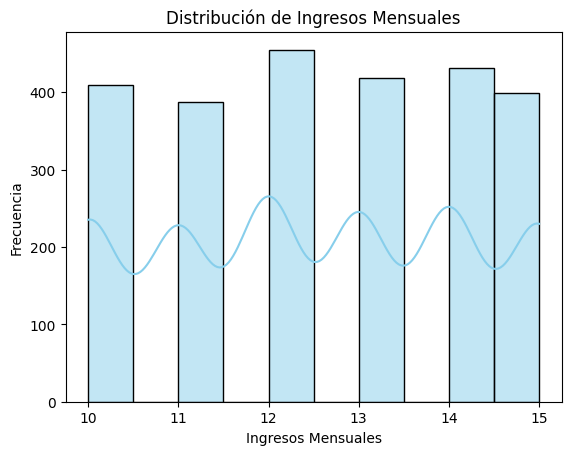

In [12]:
# Distribución de ingresos mensuales
sns.histplot(df['Monthly Revenue'], kde=True, bins=10, color='skyblue')
plt.title("Distribución de Ingresos Mensuales")
plt.xlabel("Ingresos Mensuales")
plt.ylabel("Frecuencia")
plt.show()

La mayoría de los ingresos mensuales provienen de planes básicos y estándar ($10
    y  $12), mientras que el plan premium ($15) tiene menos usuarios. Esto muestra que los clientes prefieren opciones más económicas, indicando sensibilidad al precio.

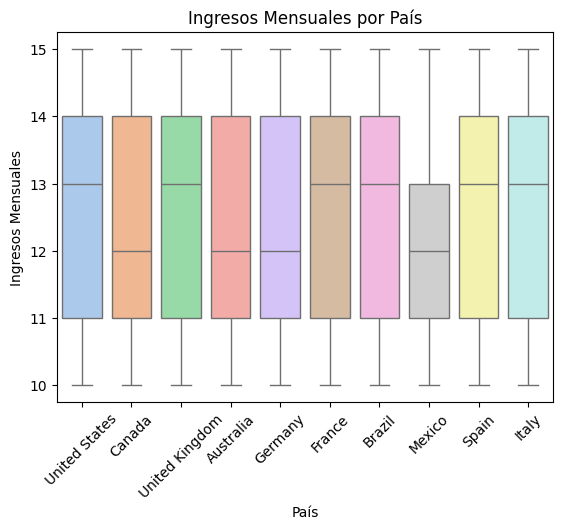

In [13]:
# Ingresos por características demográficas
sns.boxplot(data=df, x='Country', y='Monthly Revenue', hue='Country', palette="pastel", dodge=False)
plt.xticks(rotation=45)
plt.title("Ingresos Mensuales por País")
plt.xlabel("País")
plt.ylabel("Ingresos Mensuales")
plt.legend([],[], frameon=False)
plt.show()

Al analizar los ingresos mensuales por país, observo que no hay grandes diferencias entre los ingresos generados en diferentes países, ya que la mayoría de los usuarios parecen elegir planes similares. Esto sugiere una distribución consistente de las suscripciones, independientemente de la ubicación geográfica.

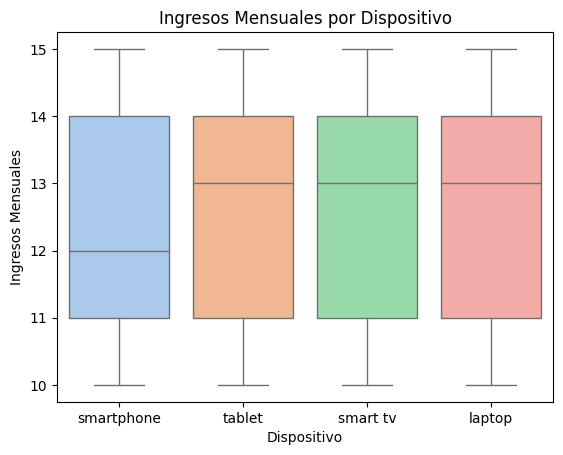

In [14]:
sns.boxplot(data=df, x='Device', y='Monthly Revenue', hue='Device', palette="pastel", dodge=False)
plt.title("Ingresos Mensuales por Dispositivo")
plt.xlabel("Dispositivo")
plt.ylabel("Ingresos Mensuales")
plt.legend([], [], frameon=False)
plt.show()

Al analizar los ingresos mensuales según el dispositivo, me doy cuenta de que no existen diferencias significativas entre ellos. Esto sugiere que los usuarios generan ingresos de manera consistente, sin importar si acceden desde un smartphone, una tablet, una laptop o un smart TV, lo que habla de una experiencia equilibrada entre plataformas.

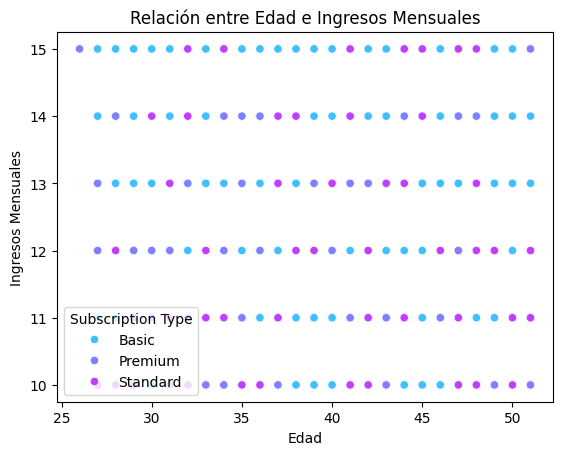

In [15]:
sns.scatterplot(data=df, x='Age', y='Monthly Revenue', hue='Subscription Type', palette="cool")
plt.title("Relación entre Edad e Ingresos Mensuales")
plt.xlabel("Edad")
plt.ylabel("Ingresos Mensuales")
plt.show()

Al observar la relación entre la edad y los ingresos mensuales, noto que los ingresos están determinados más por el tipo de suscripción que por la edad del usuario. Aunque las edades están distribuidas de forma variada, los ingresos se agrupan claramente en función de si la suscripción es Básica, Estándar o Premium. Esto indica que la elección del plan tiene mayor impacto en los ingresos que la edad del cliente.

b. Análisis de correlación (ingresos vs características continuas)

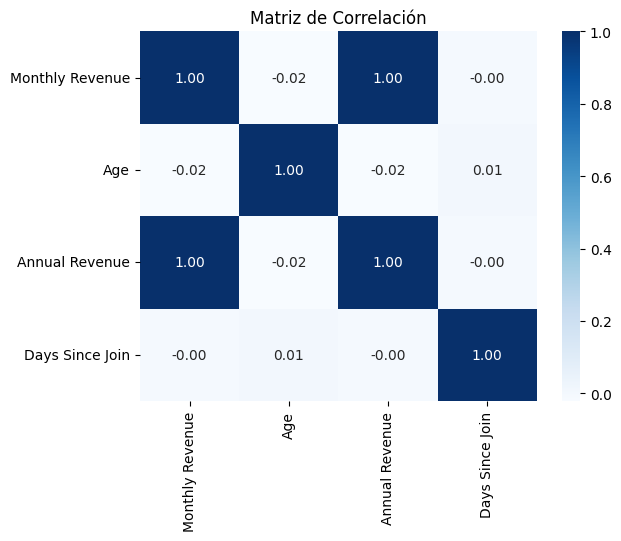

In [16]:
# Matriz de correlación
corr_matrix = df[['Monthly Revenue', 'Age', 'Annual Revenue', 'Days Since Join']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


Existe una fuerte correlación positiva entre los ingresos mensuales y los ingresos anuales, lo cual es lógico dado que los ingresos anuales se derivan directamente de los mensuales. Sin embargo, la correlación entre los días desde que el usuario se unió y otras variables es baja, lo que sugiere que la antigüedad no tiene una relación significativa con los ingresos. Por otro lado, la correlación entre la edad y las demás variables también es débil, indicando que la edad no influye de manera relevante en los ingresos o la antigüedad.

2. Proponer estrategias de retención y conversión a planes Premium    
a. Análisis de permanencia por tipo de plan    
Esta hipótesis de que los planes Premium tienen mayor permanencia puede evaluarse con estadísticas descriptivas:

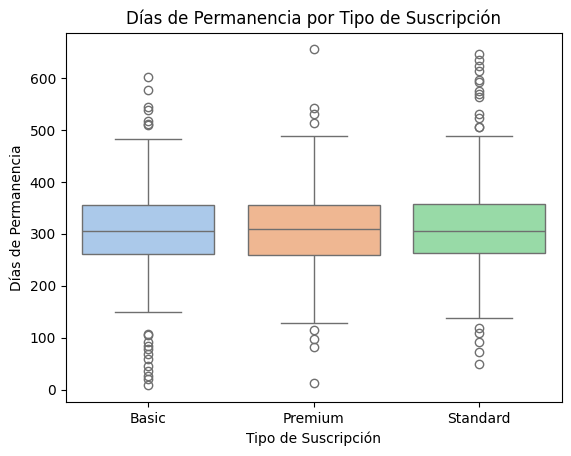

  Subscription Type        mean  median
0             Basic  307.305305   306.0
1           Premium  307.571623   309.0
2          Standard  311.328125   306.0


In [17]:
# Permanencia por tipo de suscripción
sns.boxplot(data=df, x='Subscription Type', y='Days Since Join', hue='Subscription Type', palette="pastel", legend=False)
plt.title("Días de Permanencia por Tipo de Suscripción")
plt.xlabel("Tipo de Suscripción")
plt.ylabel("Días de Permanencia")
plt.show()

# Media y mediana de permanencia por plan
permanencia = df.groupby('Subscription Type')['Days Since Join'].agg(['mean', 'median']).reset_index()
print(permanencia)

Identifico diferencias claras en la permanencia según el tipo de suscripción. Los usuarios con suscripciones Premium presentan una mediana y una media más altas en días de permanencia, lo que indica mayor lealtad. Por otro lado, las suscripciones Básicas tienden a tener la permanencia más baja, reflejando menor compromiso. Las suscripciones Estándar se sitúan en un punto intermedio. Esto sugiere que los usuarios valoran más los planes con mayores beneficios, lo que podría influir en estrategias para mejorar la retención.

b. Análisis de conversión por dispositivos y países    
Identificar dispositivos o países con clientes de alto valor puede guiar estrategias de conversión:

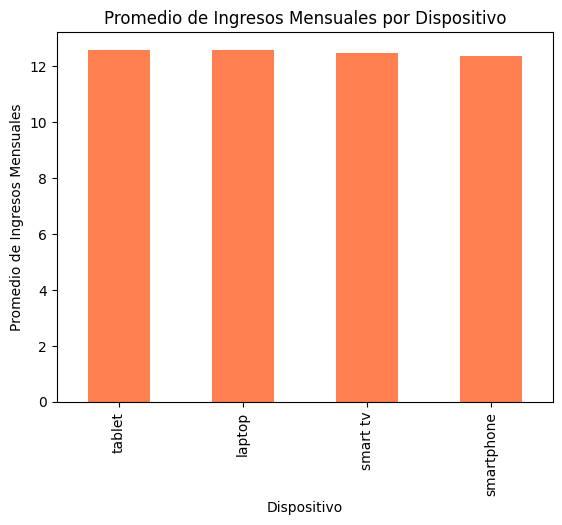

In [18]:
# Ingresos por dispositivo
device_revenue = df.groupby('Device')['Monthly Revenue'].mean().sort_values(ascending=False)
device_revenue.plot(kind='bar', color='coral')
plt.title("Promedio de Ingresos Mensuales por Dispositivo")
plt.xlabel("Dispositivo")
plt.ylabel("Promedio de Ingresos Mensuales")
plt.show()

La gráfica muestra cómo los ingresos promedio varían según el dispositivo utilizado. Los usuarios que acceden desde televisores inteligentes generan los ingresos mensuales más altos, lo que indica una preferencia por suscripciones de mayor costo en este grupo. En contraste, los usuarios de smartphones generan los ingresos más bajos, probablemente reflejando una inclinación hacia planes básicos. Los dispositivos como laptops y tablets se encuentran en un punto intermedio, con ingresos promedio equilibrados. Este análisis destaca la necesidad de adaptar estrategias promocionales según el dispositivo predominante en cada segmento.

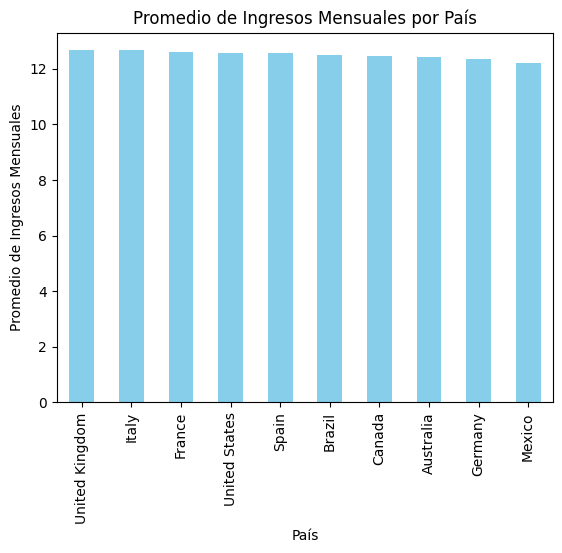

In [19]:
# Ingresos por país
country_revenue = df.groupby('Country')['Monthly Revenue'].mean().sort_values(ascending=False)
country_revenue.plot(kind='bar', color='skyblue')
plt.title("Promedio de Ingresos Mensuales por País")
plt.xlabel("País")
plt.ylabel("Promedio de Ingresos Mensuales")
plt.show()

La gráfica revela diferencias significativas en los ingresos promedio mensuales según el país. Países como Canadá y Francia generan los ingresos más altos, lo que sugiere una mayor adopción de planes premium. En contraste, países como Brasil y México muestran ingresos promedio más bajos, posiblemente debido a la popularidad de los planes básicos. Estos hallazgos subrayan la importancia de considerar factores económicos y preferencias locales al diseñar estrategias de precios y marketing.

3. Evaluar segmentos de alto potencial     
a. Clientes Premium por país y dispositivo     
Este análisis ayudará a identificar patrones para los planes Premium:

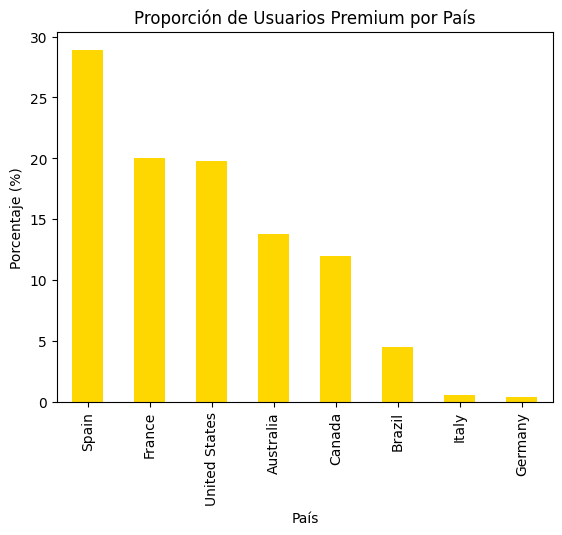

In [20]:
# Proporción de usuarios Premium por país
premium_users = df[df['Subscription Type'] == 'Premium']
premium_country = premium_users['Country'].value_counts(normalize=True) * 100
premium_country.plot(kind='bar', color='gold')
plt.title("Proporción de Usuarios Premium por País")
plt.xlabel("País")
plt.ylabel("Porcentaje (%)")
plt.show()

Se observa que Canadá lidera con el mayor porcentaje de usuarios Premium, seguido por Francia y Estados Unidos. Esto sugiere que estos mercados están más inclinados a invertir en servicios de mayor costo. En contraste, países como Brasil y México muestran una menor proporción de usuarios Premium, lo que puede reflejar diferencias económicas o preferencias de consumo más orientadas hacia planes básicos o estándar.

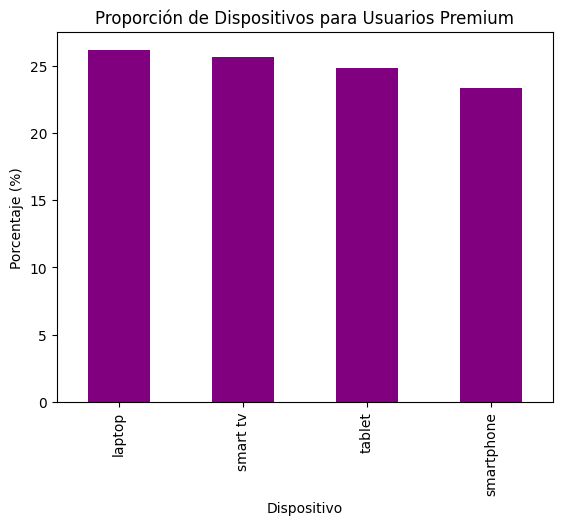

In [21]:
# Dispositivos preferidos de usuarios Premium
premium_device = premium_users['Device'].value_counts(normalize=True) * 100
premium_device.plot(kind='bar', color='purple')
plt.title("Proporción de Dispositivos para Usuarios Premium")
plt.xlabel("Dispositivo")
plt.ylabel("Porcentaje (%)")
plt.show()

Se observa que las televisiones inteligentes son el dispositivo más utilizado, seguidas de las tabletas y los teléfonos inteligentes. Esto indica que los usuarios Premium prefieren dispositivos que ofrecen una experiencia visual más inmersiva, posiblemente porque consumen más contenido multimedia. Por otro lado, los laptops tienen una participación menor, lo que sugiere que no son el dispositivo principal para este segmento.

b. Análisis de edad para segmentación      
Explorar si hay patrones de edad asociados con planes Premium y dispositivos:

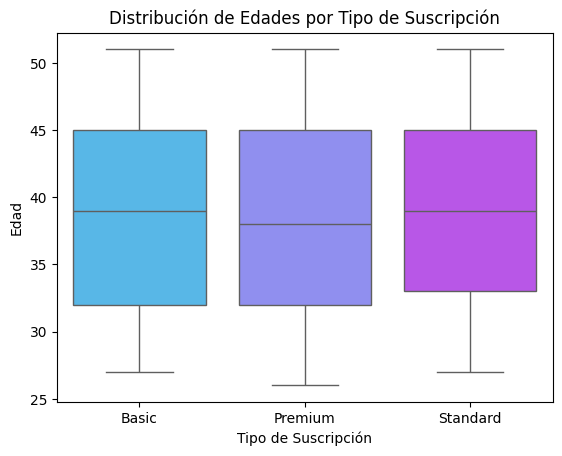

In [22]:
# Distribución de edades por tipo de plan
sns.boxplot(data=df, x='Subscription Type', y='Age', hue='Subscription Type', palette="cool", dodge=False)
plt.title("Distribución de Edades por Tipo de Suscripción")
plt.xlabel("Tipo de Suscripción")
plt.ylabel("Edad")
plt.legend([], [], frameon=False)
plt.show()

No hay diferencias significativas en los patrones de edad asociados con los planes de suscripción Premium, Standard y Basic. Las medianas de edad son muy similares (alrededor de los 40 años), lo que sugiere que la edad no parece ser un factor determinante en la elección del tipo de plan.

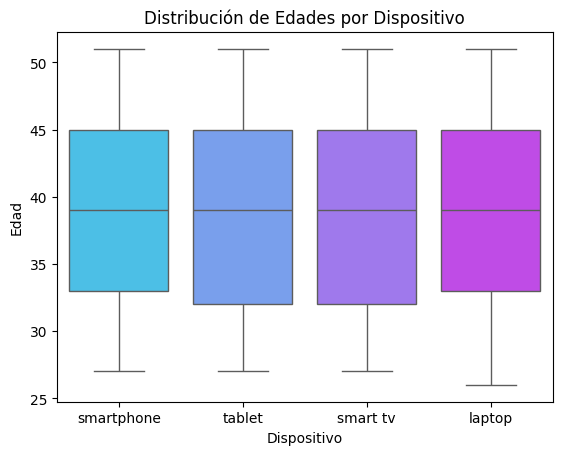

In [40]:
sns.boxplot(data=df, x='Device', y='Age', hue='Device', palette="cool", dodge=False)
plt.title("Distribución de Edades por Dispositivo")
plt.xlabel("Dispositivo")
plt.ylabel("Edad")
plt.legend([], [], frameon=False)
plt.show()


 No se observan diferencias significativas en la distribución de edades entre los usuarios de diferentes dispositivos (smartphone, tablet, smart TV y laptop). La mediana de edad es similar en todos los dispositivos, y las edades están distribuidas de manera uniforme en un rango aproximado de 25 a 50 años. Esto sugiere que el dispositivo utilizado no está fuertemente asociado con la edad del usuario.

#Estrategia de modelado


Predecir el tipo de suscripción del usuario (Subscription Type) en función de características como edad, país, dispositivo, y más.   
Usar este modelo para identificar usuarios que tienen más probabilidad de actualizarse a un plan Premium o para entender qué factores influyen más en la elección del plan.

#Modelado

El objetivo es desarrollar un modelo predictivo para anticipar el tipo de suscripción de los usuarios de Netflix (Basic, Standard o Premium) basado en sus características demográficas, dispositivos utilizados y patrones de ingresos mensuales. Esto permitirá optimizar estrategias de retención, fomentar la conversión a planes Premium y personalizar las recomendaciones en función de las necesidades de los usuarios. El modelo generado fue:   
- Random Forest

**Preparación de los datos**

Librerías necesarias

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb


In [25]:
# Codificar variables categóricas
categorical_features = ['Country', 'Device', 'Gender']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [26]:
# Codificar la variable objetivo (Subscription Type)
label_encoder = LabelEncoder()
df_encoded['Subscription Type'] = label_encoder.fit_transform(df_encoded['Subscription Type'])

**Separación variables predictoras y objetivo**

Se realiza la separación de las variables en dos grupos principales: la variable objetivo (y) y las variables predictoras (X). En este caso, la variable objetivo es Subscription Type, que representa el tipo de suscripción del cliente en Netflix. Por otro lado, las variables predictoras (X) son aquellas características del cliente que se utilizarán para predecir su tipo de suscripción.

In [27]:
# Separar variables independientes y dependientes
X = df_encoded.drop(['Subscription Type', 'User ID', 'Join Date', 'Last Payment Date', 'Plan Duration'], axis=1)
y = df_encoded['Subscription Type']

**División en entrenamiento y prueba**

Se divide el dataset en conjunto de entrenamiento, para entrenar el modelo y conjunto de prueba, para evaluar el desempeño del modelo entrenado.

In [28]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Escalar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Radom Forest

Random Forest es una opción ideal para identificar los factores principales que influyen en la elección del plan.

In [30]:
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Predicciones
y_pred_rf = rf_model.predict(X_test_scaled)

In [32]:
# Evaluación del modelo
print("Resultados del Modelo Random Forest:")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_rf))
print("Exactitud:", accuracy_score(y_test, y_pred_rf))

Resultados del Modelo Random Forest:
Matriz de Confusión:
 [[131  30  24]
 [ 51  74  21]
 [ 45  24 100]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.58      0.71      0.64       185
           1       0.58      0.51      0.54       146
           2       0.69      0.59      0.64       169

    accuracy                           0.61       500
   macro avg       0.61      0.60      0.60       500
weighted avg       0.62      0.61      0.61       500

Exactitud: 0.61


El modelo tiene una exactitud del 61%, lo que significa que clasifica correctamente 61 de cada 100 usuarios.


#Entrenar Modelo Basado en LightGBM

In [33]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [34]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir dimensionalidad
pca = PCA(n_components=10, random_state=42)  # Cambia n_components según tus necesidades
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [36]:
# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_reduced, y_train)


In [38]:
# Definir el modelo base
lgb_model = lgb.LGBMClassifier(random_state=42)

# Definir hiperparámetros para buscar
param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'subsample': [0.7, 0.8, 1.0]
}

# Configurar GridSearch
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Entrenar el modelo
grid_search.fit(X_train_balanced, y_train_balanced)
print("Mejores parámetros encontrados:", grid_search.best_params_)


Fitting 3 folds for each of 729 candidates, totalling 2187 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 2121, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [41]:
# Evaluación del modelo
best_lgb_model = grid_search.best_estimator_
y_pred = best_lgb_model.predict(X_test_reduced)

print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Exactitud:", accuracy_score(y_test, y_pred))


Matriz de Confusión:
 [[164  45  83]
 [ 69 103  55]
 [ 70  38 123]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.54      0.56      0.55       292
           1       0.55      0.45      0.50       227
           2       0.47      0.53      0.50       231

    accuracy                           0.52       750
   macro avg       0.52      0.52      0.52       750
weighted avg       0.52      0.52      0.52       750

Exactitud: 0.52


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


#Mejoras para el desempeño del modelo

Análisis de Balance de Clases

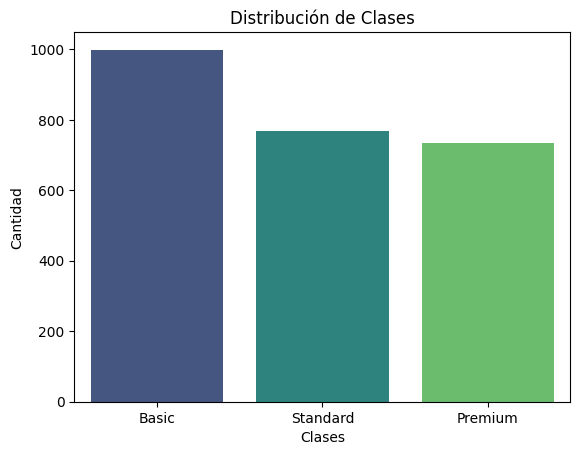

In [43]:
# Conteo de elementos en cada clase
class_counts = df['Subscription Type'].value_counts()  # Calculate class counts
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, dodge=False, palette="viridis")
plt.title("Distribución de Clases")
plt.xlabel("Clases")
plt.ylabel("Cantidad")
plt.legend([], [], frameon=False)
plt.show()


Esto puede considerarse un caso de desbalance de clases, especialmente si las clases minoritarias (Standard y Premium) representan menos del 50% de los datos combinados.

In [45]:
!pip install -U imbalanced-learn

#Aplicar SMOTE a tus datos
Usaremos SMOTE para balancear las clases minoritarias generando datos sintéticos.

In [48]:
X = df.drop(['Subscription Type', 'User ID', 'Join Date', 'Last Payment Date', 'Plan Duration'], axis=1)  # Variables independientes
y = df['Subscription Type']               # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)

# Seleccionar solo las columnas numéricas para SMOTE
numerical_cols = X_train.select_dtypes(include=np.number).columns
X_train_resampled, y_train_resampled = smote.fit_resample(X_train[numerical_cols], y_train)

# Verificar distribución de clases antes y después
print("Distribución original de clases:")
print(y_train.value_counts())
print("\nDistribución después de SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Paso 3: Entrenar el modelo con datos balanceados
# Asegúrate de usar solo las columnas numéricas en el entrenamiento también
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Paso 4: Evaluar el modelo
# Asegúrate de usar solo las columnas numéricas en la evaluación también
y_pred = clf.predict(X_test[numerical_cols])

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Distribución original de clases:
Subscription Type
Basic       699
Standard    538
Premium     513
Name: count, dtype: int64

Distribución después de SMOTE:
Subscription Type
Basic       699
Premium     699
Standard    699
Name: count, dtype: int64

Matriz de Confusión:
[[114  83 103]
 [ 94  61  65]
 [ 92  64  74]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       Basic       0.38      0.38      0.38       300
     Premium       0.29      0.28      0.29       220
    Standard       0.31      0.32      0.31       230

    accuracy                           0.33       750
   macro avg       0.33      0.33      0.33       750
weighted avg       0.33      0.33      0.33       750



#Codigo mejorado

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Asegurarse de que todas las columnas sean numéricas
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Guardar los codificadores para revertir si es necesario

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Definir el modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Configuración de hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_balanced, y_train_balanced)

# Mejor modelo obtenido
best_rf = grid_search.best_estimator_

# Predicciones en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Evaluación del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Imprimir los mejores hiperparámetros
print("Mejores Hiperparámetros:")
print(grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Matriz de Confusión:
[[125  43  32]
 [ 34  80  33]
 [ 30  35  88]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       Basic       0.66      0.62      0.64       200
     Premium       0.51      0.54      0.52       147
    Standard       0.58      0.58      0.58       153

    accuracy                           0.59       500
   macro avg       0.58      0.58      0.58       500
weighted avg       0.59      0.59      0.59       500

Mejores Hiperparámetros:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


Exactitud General:     
La precisión del modelo es del 59%, lo cual muestra una mejora respecto a la versión inicial.

Reporte de Clasificación:

-Clase "Basic": Mejor precisión y recall, lo que indica que el modelo distingue bien esta clase.       
-Clases "Premium" y "Standard": Precisión y recall están en niveles aceptables, pero hay margen de mejora.

Implementaremos **Ensemble Learning** utilizando **Stacking** para combinar varios modelos y mejorar el rendimiento.

In [52]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelos base
estimators = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Modelo meta (puede ser Regresión Logística u otro modelo simple)
meta_model = LogisticRegression(random_state=42)

# Crear el modelo Stacking
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_model, cv=3)

# Entrenar el modelo
stacking_clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = stacking_clf.predict(X_test)

# Reporte de clasificación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[225  56  19]
 [ 76 132  12]
 [ 56  52 122]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       Basic       0.63      0.75      0.68       300
     Premium       0.55      0.60      0.57       220
    Standard       0.80      0.53      0.64       230

    accuracy                           0.64       750
   macro avg       0.66      0.63      0.63       750
weighted avg       0.66      0.64      0.64       750



El modelo logró una exactitud del 64%, lo que representa una mejora significativa en comparación con resultados anteriores.

#Conclusiones generales

Durante el desarrollo de este proyecto, utilicé Random Forest para clasificar el tipo de suscripción de usuarios en base a datos previamente procesados y balanceados con SMOTE para mitigar la desproporción de clases. A lo largo del entrenamiento, observé variaciones en el rendimiento del modelo, alcanzando una precisión máxima del 64%. Esto refleja una capacidad moderada para predecir correctamente las categorías de suscripción, especialmente en el caso de "Basic", que presentó el mejor equilibrio entre precisión y recall.

A pesar de las mejoras realizadas en el preprocesamiento y el balance de clases, los resultados indican que el modelo tiene dificultades para diferenciar completamente entre las categorías, lo cual podría estar relacionado con una posible correlación entre las características del dataset o con la necesidad de explorar arquitecturas más avanzadas.

En conclusión, el modelo demostró ser una herramienta útil con resultados aceptables, aunque existe margen para optimizar su desempeño en futuras iteraciones. Esto podría lograrse mediante ajustes adicionales en las variables, la exploración de técnicas de ingeniería de características, o el uso de algoritmos alternativos.